In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
DATA_DIR = os.path.abspath('./datasets/output/data_2.csv')

In [5]:
#nltk.download('stopwords')

## Loading Data

In [6]:
df = pd.read_csv(DATA_DIR,index_col=0)
df.head()

,class,text
id,,
0,Interview,"﻿विडम्बना, ओलीको सत्ता सवारी पनि सिंहदरबारमा फ..."
1,Interview,﻿नेपाली कांग्रेसको सभापतिमा रामचन्द्र पौडेलको ...
2,Interview,﻿\nदुर्भाग्य नै भन्नुपर्छ हाम्रो प्राथमिकता पे...
3,Interview,"﻿नयनराज पाण्डे, लेखक\nविमोचन हुनै लागेको तपाईं..."
4,Interview,"﻿- भवन भट्ट, उपाध्यक्ष, गैर आवासीय नेपाली संघ\..."


In [7]:
df.dropna(inplace=True)

In [8]:
y = df['class']
X = df['text']

In [9]:
X[0]

'\ufeffविडम्बना, ओलीको सत्ता सवारी पनि सिंहदरबारमा फोटो झुण्ड्याउने मार्गतिरै अघि बढिरहेको छ।\nकल्पना गर्नुुस्, कसैले तपाईंको कन्चटमा पेस्तोल राख्दै तत्काल ‘एमाले अध्यक्ष तथा प्रधानमन्त्री केपी शर्मा ओली, एनेकपा माओवादीका अध्यक्ष पुष्पकमल दाहाल र नेपाली कांग्रेसका सभापति शेरबहादुर देउवामध्ये उत्कृष्ट को हो?’ भनी सोध्यो। के तपाईं निमेषभरमै एकजनाको नाम भन्न सक्नुहोला? जवाफ सहज छैन।\nहामीले माने पनि नमाने पनि वर्तमान नेपाली राजनीतिका त्रिमूर्ति यिनै हुन्। यिनकै विवेक, बेवकूफी, बेहोशीले नै नेपालको दशा र दिशा निर्धारित गरिरहेको छ।\nअहिले एमाले अध्यक्ष ओली सत्ता राजनीतिको केन्द्रमा छन्। पार्टी प्रमुख र प्रधानमन्त्रीमा उनलाई प्राप्त यो पहिलो मौका संभवतः अन्तिम पनि हो, जसमा उनकै स्वीकारोक्ति पटकपटक सुनिएकै छ।\nपार्टी नेतृत्वमा चुनिंदा अरूहरू जस्तो आफूसँग प्रशस्त समय नभएका कारण छिटोछिटो गर्ने, निःसन्तान रहेकाले धन सञ्चित गर्नु नपर्ने जस्ता भनाइले उनले चर्चा कमाएका थिए। पार्टी अध्यक्षका रूपमा संविधानलेखनमा देखाएको जुझारु भूमिकाले पनि नागरिकले स्वाभाविक रूपमा उनीबाट केही अपेक्षा राखेका थिए।\nतर, 

In [10]:
labels=list(set(df['class']))
labels

['Bank',
 'Literature',
 'Employment',
 'Interview',
 'Technology',
 'Business',
 'Automobiles',
 'Opinion',
 'Politics',
 'Sports',
 'Agriculture',
 'Economy',
 'Society',
 'Tourism',
 'Education',
 'Migration',
 'Entertainment',
 'Blog',
 'World']

In [11]:
len(labels)

19

### Processing Data

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
nepali_stop_words = set(stopwords.words('nepali'))

In [14]:
# tfidfVectorizer = TfidfVectorizer(stop_words=nepali_stop_words,encoding='utf-8',decode_error='ignore')

In [15]:
tfidfVectorizer = TfidfVectorizer(tokenizer= lambda x: x.split(" "),
                                  sublinear_tf=True, encoding='utf-8',
                                  decode_error='ignore',
                                  max_df=0.5,
                                  min_df=10,
                                  stop_words=nepali_stop_words)

In [16]:
X_vectorized = tfidfVectorizer.fit_transform(X)

/home/ash/Desktop/projects/nepali_news_classifier_recommender/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['कम', 'से'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [17]:
X_vectorized

<5475x14431 sparse matrix of type '<class 'numpy.float64'>'
	with 740939 stored elements in Compressed Sparse Row format>

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
X_train.shape, y_train.shape

((4380,), (4380,))

In [20]:
X_test.shape, y_test.shape

((1095,), (1095,))

## SVC Classifier

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

In [22]:
svc_clf = Pipeline([
    ('vectorizer',tfidfVectorizer),
    ('chi2',SelectKBest(chi2,k=5000)),
    ('clf',SVC())
])
svc_clf_no_feat_sel = Pipeline([
    ('vectorizer',tfidfVectorizer),

    ('clf',SVC())
])

In [23]:
svc_clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'अक्सर', 'अगाडी', 'अझै', 'अनुसार',
                                             'अन्तर्गत', 'अन्य', 'अन्यत्र',
                                             'अन्यथा', 'अब', 'अरु', 'अरुलाई',
                                             'अर्को', 'अर्थात', 'अर्थात्',
                                             'अलग', 'आए', 'आजको', 'आत्म', 'आदि',
                                             'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो',
                                             'आयो', 'उदाहरण', 'उनको', 'उनले',
                                             'उप', 'उहालाई', 'एउटै', ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7f01e23ef550>)),
                ('chi2',
                 SelectKBest(k=5000,
                             score_func=<function chi2 at 0x7f01e02c6

In [24]:
svc_clf_no_feat_sel.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'अक्सर', 'अगाडी', 'अझै', 'अनुसार',
                                             'अन्तर्गत', 'अन्य', 'अन्यत्र',
                                             'अन्यथा', 'अब', 'अरु', 'अरुलाई',
                                             'अर्को', 'अर्थात', 'अर्थात्',
                                             'अलग', 'आए', 'आजको', 'आत्म', 'आदि',
                                             'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो',
                                             'आयो', 'उदाहरण', 'उनको', 'उनले',
                                             'उप', 'उहालाई', 'एउटै', ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7f01e23ef550>)),
                ('clf', SVC())])

In [25]:
print("Accuracy on train Set : ", svc_clf.score(X_train,y_train))
print("Accuracy on test Set : ", svc_clf.score(X_test,y_test))


Accuracy on train Set :  0.9650684931506849
Accuracy on test Set :  0.6986301369863014


In [26]:
print("Accuracy on train Set : ", svc_clf_no_feat_sel.score(X_train,y_train))
print("Accuracy on test Set : ", svc_clf_no_feat_sel.score(X_test,y_test))

Accuracy on train Set :  0.9707762557077626
Accuracy on test Set :  0.6602739726027397


### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_clf = Pipeline([
    ('vectorizer',tfidfVectorizer),
    ('chi2',SelectKBest(chi2,k=5000)),
    ('clf',RandomForestClassifier(
            n_estimators=2000, 
            max_depth=20, 
            min_samples_split=6, 
            min_samples_leaf=5, 
            bootstrap=True,
            verbose=1,
            n_jobs = -1
        )
    )
])
rf_clf_no_feat_sel = Pipeline([
    ('vectorizer',tfidfVectorizer),
    ('clf',RandomForestClassifier(
            n_estimators=2000, 
            max_depth=20, 
            min_samples_split=6, 
            min_samples_leaf=5, 
            bootstrap=True,
            verbose=1,
            n_jobs = -1
        )
    )
])

In [28]:
rf_clf.fit(X_train,y_train)
rf_clf_no_feat_sel.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    5.7s
[Parallel(n_jobs=

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'अक्सर', 'अगाडी', 'अझै', 'अनुसार',
                                             'अन्तर्गत', 'अन्य', 'अन्यत्र',
                                             'अन्यथा', 'अब', 'अरु', 'अरुलाई',
                                             'अर्को', 'अर्थात', 'अर्थात्',
                                             'अलग', 'आए', 'आजको', 'आत्म', 'आदि',
                                             'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो',
                                             'आयो', 'उदाहरण', 'उनको', 'उनले',
                                             'उप', 'उहालाई', 'एउटै', ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fb5f3efc310>)),
                ('clf',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=5,
                                 

In [29]:
print("Accuracy on train Set : ", rf_clf.score(X_train,y_train))
print("Accuracy on test Set : ", rf_clf.score(X_test,y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.3s finished


Accuracy on train Set :  0.6730593607305936


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s


Accuracy on test Set :  0.5726027397260274


[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.4s finished


In [30]:
print("Accuracy on train Set : ", rf_clf_no_feat_sel.score(X_train,y_train))
print("Accuracy on test Set : ", rf_clf_no_feat_sel.score(X_test,y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.6s finished


Accuracy on train Set :  0.6527397260273973


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.5s


Accuracy on test Set :  0.5634703196347032


[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.5s finished


### Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [32]:
bnb_clf = Pipeline([
    ('vect', tfidfVectorizer),
    ('clf', BernoulliNB(alpha=0.01))
])

mnb_clf = Pipeline([
    ('vect', tfidfVectorizer),
    ('clf', MultinomialNB(alpha=0.01, fit_prior=True))
])

In [33]:
bnb_clf.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'अक्सर', 'अगाडी', 'अझै', 'अनुसार',
                                             'अन्तर्गत', 'अन्य', 'अन्यत्र',
                                             'अन्यथा', 'अब', 'अरु', 'अरुलाई',
                                             'अर्को', 'अर्थात', 'अर्थात्',
                                             'अलग', 'आए', 'आजको', 'आत्म', 'आदि',
                                             'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो',
                                             'आयो', 'उदाहरण', 'उनको', 'उनले',
                                             'उप', 'उहालाई', 'एउटै', ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fb5f3efc310>)),
                ('clf', BernoulliNB(alpha=0.01))])

In [34]:
print("Accuracy on train Set : ", bnb_clf.score(X_train,y_train))
print("Accuracy on test Set : ", bnb_clf.score(X_test,y_test))

Accuracy on train Set :  0.910958904109589
Accuracy on test Set :  0.6712328767123288


In [35]:
mnb_clf.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'अक्सर', 'अगाडी', 'अझै', 'अनुसार',
                                             'अन्तर्गत', 'अन्य', 'अन्यत्र',
                                             'अन्यथा', 'अब', 'अरु', 'अरुलाई',
                                             'अर्को', 'अर्थात', 'अर्थात्',
                                             'अलग', 'आए', 'आजको', 'आत्म', 'आदि',
                                             'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो',
                                             'आयो', 'उदाहरण', 'उनको', 'उनले',
                                             'उप', 'उहालाई', 'एउटै', ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fb5f3efc310>)),
                ('clf', MultinomialNB(alpha=0.01))])

In [36]:
print("Accuracy on train Set : ", mnb_clf.score(X_train,y_train))
print("Accuracy on test Set : ", mnb_clf.score(X_test,y_test))

Accuracy on train Set :  0.9383561643835616
Accuracy on test Set :  0.7031963470319634


## Classification Report


In [37]:
from sklearn.metrics import classification_report

#### SVM

In [38]:
y_pred = svc_clf.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

  Agriculture       0.92      0.58      0.71        19
  Automobiles       1.00      0.95      0.98        21
         Bank       0.85      0.91      0.88        89
         Blog       0.61      0.27      0.38        51
     Business       0.32      0.30      0.31        33
      Economy       0.70      0.84      0.76       106
    Education       0.91      0.57      0.70        35
   Employment       0.85      0.72      0.78        40
Entertainment       0.46      0.89      0.61        95
    Interview       0.23      0.15      0.18        47
   Literature       0.96      0.59      0.73        37
    Migration       0.91      0.56      0.69        18
      Opinion       0.82      0.93      0.87       109
     Politics       0.89      0.98      0.93       102
      Society       0.88      0.70      0.78        33
       Sports       0.76      0.83      0.79       140
   Technology       1.00      0.18      0.31        22
      Tou

In [39]:
y_pred = svc_clf_no_feat_sel.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

  Agriculture       0.89      0.42      0.57        19
  Automobiles       1.00      0.81      0.89        21
         Bank       0.88      0.91      0.90        89
         Blog       0.36      0.10      0.15        51
     Business       0.30      0.30      0.30        33
      Economy       0.65      0.86      0.74       106
    Education       0.86      0.51      0.64        35
   Employment       0.83      0.60      0.70        40
Entertainment       0.38      0.89      0.54        95
    Interview       0.12      0.06      0.08        47
   Literature       1.00      0.59      0.75        37
    Migration       0.91      0.56      0.69        18
      Opinion       0.81      0.91      0.86       109
     Politics       0.87      0.97      0.92       102
      Society       0.85      0.52      0.64        33
       Sports       0.81      0.83      0.82       140
   Technology       1.00      0.14      0.24        22
      Tou

### Naive Bayes

In [40]:
y_pred = bnb_clf.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

  Agriculture       0.72      0.68      0.70        19
  Automobiles       0.90      0.86      0.88        21
         Bank       0.78      0.82      0.80        89
         Blog       0.40      0.37      0.38        51
     Business       0.12      0.12      0.12        33
      Economy       0.68      0.79      0.73       106
    Education       0.95      0.54      0.69        35
   Employment       0.86      0.60      0.71        40
Entertainment       0.47      0.64      0.54        95
    Interview       0.08      0.04      0.05        47
   Literature       0.75      0.41      0.53        37
    Migration       0.87      0.72      0.79        18
      Opinion       0.72      0.92      0.81       109
     Politics       0.87      0.89      0.88       102
      Society       0.69      0.61      0.65        33
       Sports       0.66      0.77      0.71       140
   Technology       0.79      0.50      0.61        22
      Tou

In [41]:
y_pred = mnb_clf.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

  Agriculture       0.73      0.58      0.65        19
  Automobiles       0.90      0.90      0.90        21
         Bank       0.84      0.88      0.86        89
         Blog       0.50      0.14      0.22        51
     Business       0.33      0.39      0.36        33
      Economy       0.66      0.79      0.72       106
    Education       0.85      0.63      0.72        35
   Employment       0.88      0.75      0.81        40
Entertainment       0.65      0.71      0.68        95
    Interview       0.18      0.13      0.15        47
   Literature       0.59      0.73      0.65        37
    Migration       0.70      0.78      0.74        18
      Opinion       0.58      0.91      0.71       109
     Politics       0.88      0.94      0.91       102
      Society       0.59      0.70      0.64        33
       Sports       0.93      0.74      0.82       140
   Technology       0.92      0.55      0.69        22
      Tou

### Random Forest

In [42]:
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.4s finished
/home/ash/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

  Agriculture       1.00      0.21      0.35        19
  Automobiles       1.00      0.67      0.80        21
         Bank       0.82      0.87      0.84        89
         Blog       0.00      0.00      0.00        51
     Business       0.21      0.18      0.20        33
      Economy       0.57      0.74      0.64       106
    Education       0.00      0.00      0.00        35
   Employment       0.86      0.45      0.59        40
Entertainment       0.41      0.52      0.46        95
    Interview       0.09      0.04      0.06        47
   Literature       1.00      0.19      0.32        37
    Migration       0.00      0.00      0.00        18
      Opinion       0.68      0.96      0.80       109
     Politics       0.77      0.99      0.86       102
      Society       0.80      0.12      0.21        33
       Sports       0.42      0.94      0.58       140
   Technology       0.00      0.00      0.00        22
      Tou

/home/ash/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
y_pred = rf_clf_no_feat_sel.predict(X_test)
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s


               precision    recall  f1-score   support

  Agriculture       1.00      0.11      0.19        19
  Automobiles       1.00      0.57      0.73        21
         Bank       0.81      0.88      0.84        89
         Blog       0.00      0.00      0.00        51
     Business       0.23      0.18      0.20        33
      Economy       0.56      0.73      0.63       106
    Education       0.00      0.00      0.00        35
   Employment       0.94      0.38      0.54        40
Entertainment       0.56      0.52      0.54        95
    Interview       0.05      0.02      0.03        47
   Literature       1.00      0.16      0.28        37
    Migration       0.00      0.00      0.00        18
      Opinion       0.65      0.97      0.78       109
     Politics       0.74      0.99      0.85       102
      Society       0.50      0.03      0.06        33
       Sports       0.38      0.97      0.55       140
   Technology       0.00      0.00      0.00        22
      Tou

[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.5s finished
/home/ash/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [44]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.4s finished


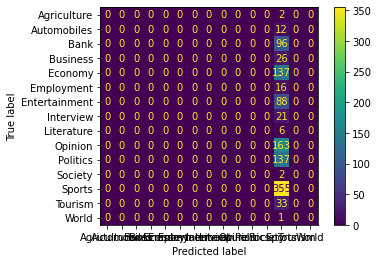

In [45]:
plot_confusion_matrix(rf_clf_no_feat_sel,y_test,y_pred)

In [46]:
best_classifier = svc_clf

In [47]:
best_classifier.named_steps['clf']

SVC()

In [48]:
import pickle
with open('svc_clf_test_set_72_acc.pkl','wb') as f:
    pickle.dump(best_classifier.named_steps['clf'], f) 


In [49]:
with open('svc_clf_test_set_72_acc.pkl','rb') as f:
    model = pickle.load(f)

In [50]:
model

SVC()

### Classification Task

In [29]:
text = '''
९ असार, काठमाडौं । युरोकप २०२० अन्तर्गत आज समूह चरणका अन्तिम चार खेल हुँदैछ । आजको खेलहरु पनि समूह चरणका खेल सकिनेछ र अन्तिम १६ को समीकरण तय हुनेछ ।
अहिले चार समूहको विजेता र समूह विजेता अनि दुई उत्कृष्ट उपविजेताले अन्तिम १६ मा स्थान बनाएका छन् ।
यस्तै समूह इ र एफबाट पनि अन्तिम १६ मा पुग्ने एक एक टिमको टुङ्गो लागेको छ ।
आजको खेलपछि दुवै समूहको विजेता र उपविजेता अनि तेस्रो हुने मध्ये उत्कृष्ट चार टोलीको टुङ्गो लाग्नेछ ।
आज समूह इ अन्तर्गत स्लोभाकिया र स्पेन तथा पोल्याण्ड र स्वीडेनबीचको खेल राति ९:४५ बजे सुरु हुनेछ ।
स्पेनले घरेलु मैदान सेभियामा स्लोभाकियासँग खेल्नेछ । यसअघिका दुई खेल बराबरी खेलेको स्पेनलाई शीर्ष दुईमा रहन जितको आवश्यकता छ । स्लोभाकिया भने बराबरीले पनि नकआउट चरणमा पुग्न सक्नेछ ।
उता स्वीडेन र पोल्याण्ड रुसको सेन्ट पिटर्सवर्गमा भिड्नेछन् । २ खेलबाट ४ अंक जोडेको स्वीडेनले नकआउटमा स्थानमा पक्का गरिसकेको छ । पोल्याण्डमा पराजित गरेमा स्वीडेन समूह विजेता बन्नेछ।
यसैगरी राति १२:४५ बजे समूह एफको दुई महत्वपूर्ण खेल हुनेछ ।
ग्रुप अफ डेथको रुपमा रहेको यस समूहमा विश्वकप विजेतार य रोपेली विजेतासहित तीन पूर्व विजेता छन् ।
आज राति विश्व विजेता फ्रान्स र युरोपेली विजेता पोर्चुगलबीच बहुप्रतिक्षित भिडन्त हुनेछ । गत संस्करणमा फाइनल खेलेका यी दुई टोली यस पटक समूह चरणमै भिड्दैछन् ।
यस्तै जर्मनीले घरेलु मैदानमा हंगेरीसँग खेल्नेछ ।
फ्रान्स ४ अंकसहित शीर्ष स्थानमा छ र जस्तो नतिजा आए पनि नकआउटमा प्रवेश गर्नेछ । जर्मनी र पोर्चुगलको समान ३ र हंगेरीको १ अंक छ ।
पोर्चुगललाई पराजित गरेमा फ्रान्स समूह विजेता बन्नेछ । यस्तै पोर्चुगललाई पनि फ्रान्सलाई हराउँदै समूह विजेता बन्ने अवसर छ तर त्यसका लागि जर्मनी र हंगेरीबीचको खेलको नतिजा कुर्नुपर्नेछ ।
यदि फ्रान्स र हंगेरी विजयी भएमा भने पोर्चुगल अन्तिम स्थानमा हुनेछ । जर्मनीले हंगेरीलाई पराजित गरेमा र फ्रान्ससँग एक गोल अन्तरले हारेमा पनि पोर्चुगल उत्कृष्ट तेस्रो टिममध्ये एक हुँदै नकआउट चरणमा प्रवेश गर्नेछ।
'''
label = 'sports'

In [30]:
svc_clf.predict([text])

array(['Sports'], dtype=object)

In [53]:
mnb_clf.predict([text])

array(['Sports'], dtype='<U13')

In [54]:
bnb_clf.predict([text])

array(['Sports'], dtype='<U13')

In [55]:
rf_clf.predict([text])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.2s finished


array(['Sports'], dtype=object)

In [27]:
text = '''
९ असार, काठमाडौं । नेपाल स्टक एक्सचेञ्ज (नेप्से) को दुई वटा वेवसाइटहरु सञ्चालनमा छन् । दुबै वेवसाइट (नयाँ र पुरानो) मा सेयर बजार प्रत्यक्ष हेर्न सकिन्छ । दुई वेवसाइटमा देखिने तथ्यांक एउटै हुन् ।
तर बुधबारको कारोबारमा भने फरक देखियो । नेप्सेकेा पुरानो वेवसाइटमा सेयर कारोबार मापक नेप्से परिसूचक ५१.६५ अंकले बजार घट्यो । बधबार बजार २ हजार ८ सय ६२ दशमलव १८ विन्दुमा पुगेर बन्द भएको देखिन्छ । उता नयाँ वेवसाइटमा भने ५३.८८ अंकले घटेर २ हजार ८ सय ५९ दशमलव ९६ अंकमा झरेको छ 
यी दुई वेवसाइटमा कसरी फरक तथ्यांक देखियो त ? नेप्सको प्रवक्ता मुराहरी पराजुली भन्छन्, ‘यो प्राविधिक समस्या हो, सिस्टममा रिफ्रेस नभएर त्यस्तो देखिएको हुनसक्छ ।’ कारोबार बन्द हुने वित्तिकै र केहि मिनेटपछि भने तथ्यांक तलमाथि हुन्छ । अपडेट हुनलाई केही समय लाग्ने भएकाले यस्तो हुने गरेको उनले बताए ।
तर बुधबार कारोबार बन्द भएको ४० मिनेटसम्म पनि यस्तो देखिनु प्राविधिक समस्या भएको र पुरानो वेवसाइटलाई विस्वास गर्नु पर्ने उनले बताए ।
‘खासमा आधिकारिक भनेको नयाँ होइन पुरानै हो, यसरी तथ्यांक फरक परेको अवस्थामा पुरानोलाई आधार मान्नुपर्छ’ प्रवक्ता पराजुलीले भने । बुधबार आज सबै समूहका परिसूचक नकारात्मक रहे । यसमा पनि सबैभन्दा बढी गुमाउनेमा विकास बैंक समुहका लगानीकर्ता परे । जलविद्युत, जीवन बिमा र होटेल समुहमा समेत पहिरो गयो । सेन्सेटिभ इन्डेक्समा ७.३७ अंकको करेक्सन देखियो ।
बुधबार कुल २१८ कम्पनीको ९१ हजार ७५ वटा कारोबार भएको छ । कुल १ करोड ९४ लाख १७ हजार ५ सय ३२ कित्ता सेयर किनबेच भएको दिन बुधबार कारोबार रकम भने साढे ८ अर्बमा खुम्चिएको छ ।
बजार लगातार घटेको समयमा पनि कारोबार रकम १० अर्ब भन्दामाथि हुने गरेको थियो । आज ८ अर्ब ३६ करोड २६ लाख ७१ हजार ६ सय ८१ रुपैयाँ बराबरको कारोबार भएको छ ।
'''
label = 'Bank'

In [28]:
svc_clf.predict([text])

array(['Bank'], dtype=object)

In [58]:
mnb_clf.predict([text])

array(['Bank'], dtype='<U13')

In [59]:
bnb_clf.predict([text])

array(['Bank'], dtype='<U13')

In [60]:
rf_clf.predict([text])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.2s finished


array(['Bank'], dtype=object)